<a href="https://colab.research.google.com/github/JaperTai77/Colab-notebook/blob/main/ML_sklearn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
data_web_address = data_web_address ="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
column_names = ['radius','texture',
                            'perimeter','area',
                            'smoothness','compactness',
                            'concavity','concave points',
                            'symmetry','malignant']
feature_names = column_names[:-1]
all_data = pd.read_csv(data_web_address , names=column_names)

In [ ]:
# Binary response
all_data['malignant'] = all_data['malignant'].astype(np.int)
all_data['malignant'] = np.where(all_data['malignant'] == 4, 1,0)
X = all_data[[col for col in feature_names if col !='compactness']]
y = all_data.malignant

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=7,stratify=y)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_proba = lr.predict_proba(X_test)

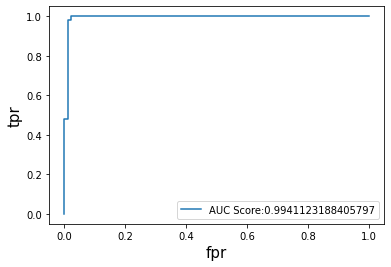

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, ths = roc_curve(y_test, y_pred_proba[:,1])
auc_score = auc(fpr,tpr)
plt.plot(fpr,tpr,label="AUC Score:" + str(auc_score))
plt.xlabel('fpr',fontsize='15')
plt.ylabel('tpr',fontsize='15')
plt.legend(loc='best')

# Clustering

## K-mean

In [ ]:
from sklearn.datasets import make_blobs
blobs, classes = make_blobs(500, centers=3)

In [ ]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)
kmean.fit(blobs)
kmean.cluster_centers_

array([[ 3.3325502 , -1.91157216],
       [-1.7732744 , -0.8010296 ],
       [ 3.15068322, -6.59238461]])

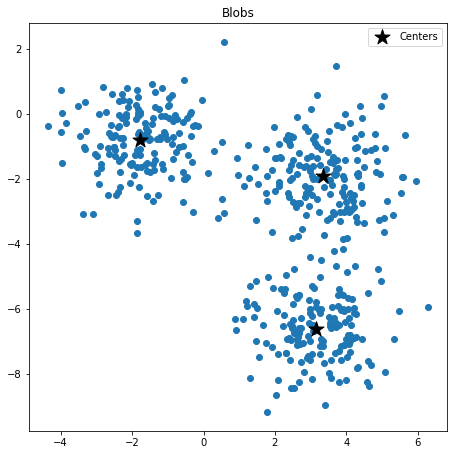

In [ ]:
f, ax = plt.subplots(figsize=(7.5, 7.5))
ax.scatter(blobs[:, 0], blobs[:, 1])
ax.scatter(kmean.cluster_centers_[:, 0],kmean.cluster_centers_[:,1], marker='*', s=250,color='black', label='Centers')
ax.set_title("Blobs")
ax.legend(loc='best')

In [ ]:
kmean.transform(blobs)[:5]

array([[5.11071603, 7.45777911, 0.7825032 ],
       [5.03224625, 6.11216239, 2.28712221],
       [5.07757046, 0.77171101, 7.92481236],
       [5.72094192, 1.32312946, 8.69213148],
       [4.11241296, 2.1257705 , 7.72012282]])

In [ ]:
from sklearn import metrics
silhouette_samples = metrics.silhouette_samples(blobs,kmean.labels_) # look at how seperate the distance from the cluster are
np.column_stack((classes[:5], silhouette_samples[:5]))

array([[0.        , 0.73200094],
       [0.        , 0.5136415 ],
       [2.        , 0.73149721],
       [2.        , 0.70476218],
       [2.        , 0.44463207]])

In [ ]:
silhouette_samples.mean()

0.6217827332635147

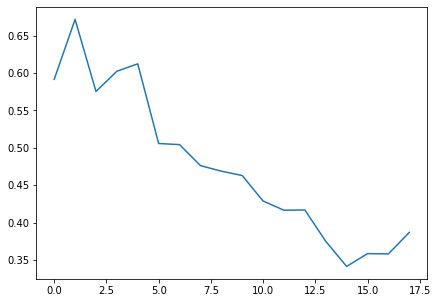

In [ ]:
blobs, classes = make_blobs(500, centers=10)
silhouette_avgs = []
for k in range(2, 20):
  kmean = KMeans(n_clusters=k).fit(blobs)
  silhouette_avgs.append(metrics.silhouette_score(blobs, kmean.labels_))
f, ax = plt.subplots(figsize=(7, 5))
ax.plot(silhouette_avgs)

## MiniBatch k-mean

With large data, less computation time

In [ ]:
from sklearn.datasets import make_blobs
blobs, labels = make_blobs(int(1e6), 3)
from sklearn.cluster import KMeans, MiniBatchKMeans

In [ ]:
minibatch = MiniBatchKMeans(batch_size=len(blobs))
cluster = minibatch.fit_predict(blobs)

## Clustering with Gaussian

Normal distributed variance instead of uniform.

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
X = np.row_stack((class_A, class_B))
y = np.hstack((np.ones(100), np.zeros(100)))
train = np.random.choice([True, False], 200)

gmm.fit(X[train])
gmm.predict(X[train])[:5]

array([0, 0, 0, 0, 0])

## Use cluster to detect outliers

In [ ]:
from sklearn.datasets import make_blobs
X, labels = make_blobs(100, centers=1)
import numpy as np
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=1)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
distances = kmeans.transform(X)
sorted_idx = np.argsort(distances.ravel())[::-1][:5] # sort 5 outliers

In [ ]:
sorted_idx

array([ 7, 89, 62, 65, 41])

# Cross-validation

## K-fold cross-validation

In [7]:
import numpy as np
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8],[1, 2], [3, 4], [5, 6], [7,8]])
y = np.array([1, 2, 1, 2, 1, 2, 1, 2])


In [17]:
from sklearn.model_selection import KFold 
kf= KFold(n_splits = 4)

cc = 1
for train_index, test_index in kf.split(X):
  print("Round : ",cc,": ",)
  print("Training indices :", train_index,)
  print("Testing indices :", test_index)
  cc += 1

Round :  1 : 
Training indices : [2 3 4 5 6 7]
Testing indices : [0 1]
Round :  2 : 
Training indices : [0 1 4 5 6 7]
Testing indices : [2 3]
Round :  3 : 
Training indices : [0 1 2 3 6 7]
Testing indices : [4 5]
Round :  4 : 
Training indices : [0 1 2 3 4 5]
Testing indices : [6 7]


In [12]:
indices_list = list(kf.split(X))
train_indices, test_indices = indices_list[3]
X[train_indices]

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8],
       [1, 2],
       [3, 4]])

## Blanced cross validation

Adjust to the equal amount of different responses

In [19]:
import numpy as np
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8],[1, 2], [3, 4], [5, 6], [7,8]])
y = np.array([1, 1, 1, 1, 2, 2, 2, 2])

In [20]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 4)
cc = 1
for train_index, test_index in skf.split(X,y):
  print("Round : ",cc,": ",)
  print("Training indices :", train_index,)
  print("Testing indices :", test_index)
  cc += 1

Round :  1 : 
Training indices : [1 2 3 5 6 7]
Testing indices : [0 4]
Round :  2 : 
Training indices : [0 2 3 4 6 7]
Testing indices : [1 5]
Round :  3 : 
Training indices : [0 1 3 4 5 7]
Testing indices : [2 6]
Round :  4 : 
Training indices : [0 1 2 4 5 6]
Testing indices : [3 7]


In [21]:
# shuffled
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits = 5,test_size=0.25)
cc = 1
for train_index, test_index in sss.split(X,y):
        print ("Round",cc,":",)
        print ("Training indices :", train_index,)
        print ("Testing indices :", test_index)
        cc += 1

Round 1 :
Training indices : [5 0 1 6 7 3]
Testing indices : [2 4]
Round 2 :
Training indices : [5 3 0 4 7 2]
Testing indices : [6 1]
Round 3 :
Training indices : [5 1 3 6 2 4]
Testing indices : [7 0]
Round 4 :
Training indices : [5 4 0 1 7 2]
Testing indices : [3 6]
Round 5 :
Training indices : [2 4 5 3 6 0]
Testing indices : [1 7]


## Time series cv

In [23]:
from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4],[1, 2], [3, 4], [1, 2], [3,4]])
y = np.array([1, 2, 3, 4, 1, 2, 3, 4])
tscv = TimeSeriesSplit(n_splits=7)

In [24]:
for train_index, test_index in tscv.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  print("Training indices:", train_index, "Testing indices:",test_index)


Training indices: [0] Testing indices: [1]
Training indices: [0 1] Testing indices: [2]
Training indices: [0 1 2] Testing indices: [3]
Training indices: [0 1 2 3] Testing indices: [4]
Training indices: [0 1 2 3 4] Testing indices: [5]
Training indices: [0 1 2 3 4 5] Testing indices: [6]
Training indices: [0 1 2 3 4 5 6] Testing indices: [7]


# Optimize Parameter

## Grid search

In [25]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y)
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
# parameter range
param_grid = {'n_neighbors': list(range(3,9,1))}

In [28]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(knn_clf,param_grid,cv=10) #cross-validation type: cv=10
gs.fit(X_train, y_train)
print(gs.best_params_)
gs.cv_results_['mean_test_score'] #k = (3,4,5,6,7,8)

{'n_neighbors': 6}


array([0.97272727, 0.97272727, 0.98181818, 0.99090909, 0.97272727,
       0.97272727])

## Randomized search

In [29]:
param_dist = {'n_neighbors': list(range(3,9,1))}
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(knn_clf,param_dist,cv=10,n_iter=6) # num of time runs: n_iter=6
rs.fit(X_train, y_train)
rs.best_params_

{'n_neighbors': 6}

In [34]:
print(rs.cv_results_['params'],rs.cv_results_['mean_test_score'])

[{'n_neighbors': 3}, {'n_neighbors': 4}, {'n_neighbors': 5}, {'n_neighbors': 6}, {'n_neighbors': 7}, {'n_neighbors': 8}] [0.97272727 0.97272727 0.98181818 0.99090909 0.97272727 0.97272727]


# Feature Selection

In [36]:
from sklearn import datasets
X, y = datasets.make_regression(1000, 10000)
from sklearn import feature_selection
f, p = feature_selection.f_regression(X, y)

In [37]:
print(f) # f-stat
print(p) # p-value

[0.30082528 0.2826405  5.80827292 ... 1.68395158 2.00593327 0.10469728]
[0.58348818 0.59509405 0.01613101 ... 0.19470006 0.15699687 0.7463317 ]


In [38]:
idx = np.arange(0, X.shape[1])
features_to_keep = idx[p < .05]
len(features_to_keep)

493

In [39]:
import sklearn.datasets as ds
diabetes = ds.load_diabetes()
X = diabetes.data
y = diabetes.target